<a href="https://colab.research.google.com/github/mitkrieg/citibike-timeseries/blob/main/fbprophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from fbprophet import Prophet
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [10]:
%cd Flatiron/Capstone/data

/gdrive/MyDrive/Flatiron/Capstone/data


In [40]:
%ls

test_ts.pickle  train_ts.pickle


In [41]:
df = pickle.load(open('/gdrive/MyDrive/Flatiron/Capstone/data/train_ts.pickle','rb'))
df_test = pickle.load(open('/gdrive/MyDrive/Flatiron/Capstone/data/test_ts.pickle','rb'))

In [42]:
df

,ds,y
0,2018-06-17 00:00:00,5.0
1,2018-06-17 01:00:00,3.5
2,2018-06-17 02:00:00,3.0
3,2018-06-17 03:00:00,2.0
4,2018-06-17 04:00:00,2.0
...,...,...
331,2018-06-30 19:00:00,14.0
332,2018-06-30 20:00:00,3.0
333,2018-06-30 21:00:00,9.5
334,2018-06-30 22:00:00,10.0


In [43]:
df_test

,ds,y
0,2018-06-18 00:00:00,2.5
1,2018-06-18 01:00:00,1.0
2,2018-06-18 02:00:00,12.0
3,2018-06-18 03:00:00,11.5
4,2018-06-18 04:00:00,11.0
...,...,...
643,2018-07-14 19:00:00,1.0
644,2018-07-14 20:00:00,3.0
645,2018-07-14 21:00:00,4.5
646,2018-07-14 22:00:00,2.5


In [34]:
m = Prophet(daily_seasonality=True, weekly_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(periods = 14*24, freq='H')
future

,ds
0,2018-06-17 00:00:00
1,2018-06-17 01:00:00
2,2018-06-17 02:00:00
3,2018-06-17 03:00:00
4,2018-06-17 04:00:00
...,...
667,2018-07-14 19:00:00
668,2018-07-14 20:00:00
669,2018-07-14 21:00:00
670,2018-07-14 22:00:00


In [36]:
forcast = m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-06-17 00:00:00,9.404598,3.418828,15.414262
1,2018-06-17 01:00:00,9.153126,2.974334,15.574460
2,2018-06-17 02:00:00,9.186885,3.086015,15.019935
3,2018-06-17 03:00:00,9.604113,3.362352,15.314317
4,2018-06-17 04:00:00,9.981806,3.634275,16.162923
...,...,...,...,...
667,2018-07-14 19:00:00,22.168310,16.256439,27.736432
668,2018-07-14 20:00:00,23.757203,18.139882,29.665176
669,2018-07-14 21:00:00,24.453819,18.537601,30.219523
670,2018-07-14 22:00:00,24.632130,18.157433,30.452892


In [44]:
train_ts = df.set_index('ds')
forcast_ts = forcast.set_index('ds')
test_ts = df_test.set_index('ds')

In [45]:
test_ts

,y
ds,
2018-06-18 00:00:00,2.5
2018-06-18 01:00:00,1.0
2018-06-18 02:00:00,12.0
2018-06-18 03:00:00,11.5
2018-06-18 04:00:00,11.0
...,...
2018-07-14 19:00:00,1.0
2018-07-14 20:00:00,3.0
2018-07-14 21:00:00,4.5


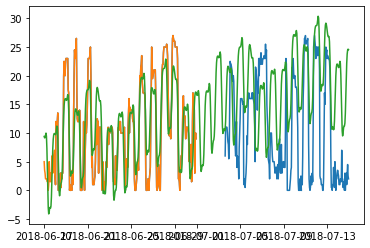

In [47]:
fig, ax = plt.subplots()
ax.plot(test_ts,label='test')
ax.plot(train_ts,label='train')
ax.plot(forcast_ts.yhat,label='forcast')